# 第10回: RNN: Exercise2-B
## 手書き文字のストローク予測 (サンプリング編)
### 概要
本演習ではchainerを用いて手書き文字のストローク予測を行います。

学習データセットとして、運動イメージの脳波データを用い、与えられた脳波から４つの運動イメージをデコードします。

まず、講師が概要を説明しますので、全体を掴んだところで演習に取り組んでください。

### 目標
- chainerでRNN, LSTM, GRUを実装する
- 手書き文字のストローク予測を行う

In [60]:
import time
import os
import pickle

from chainer import serializers

from utils import draw_strokes, draw_strokes_random_color, draw_strokes_eos_weighted, draw_strokes_pdf
from model_chainer import Model

設定ファイルを読み込みましょう。

In [70]:
# model_dir = './save/original-LSTM'
model_dir = './save2'
model_name = 'model_{}.npz'.format(1000)
with open(os.path.join(model_dir, 'config.pkl'), 'rb') as f:
    saved_args = pickle.load(f)

In [71]:
model = Model(saved_args.nb_layers, saved_args.nb_units,
              saved_args.nb_mixtures, saved_args.data_scale,
              saved_args.keep_prob)

In [72]:
checkpoint_path = os.path.join(model_dir, model_name)
serializers.load_npz(checkpoint_path, model)
print("loading model: ", checkpoint_path)

if saved_args.gpu >= 0:
    model.to_gpu(saved_args.gpu)

loading model:  ./save2/model_1000.npz


/home/smatsumori/Workspace/write-rnn-tensorflow/model_chainer.py:107: RuntimeWarning: covariance is not positive-semidefinite.
  x = np.random.multivariate_normal(mean, cov, 1)


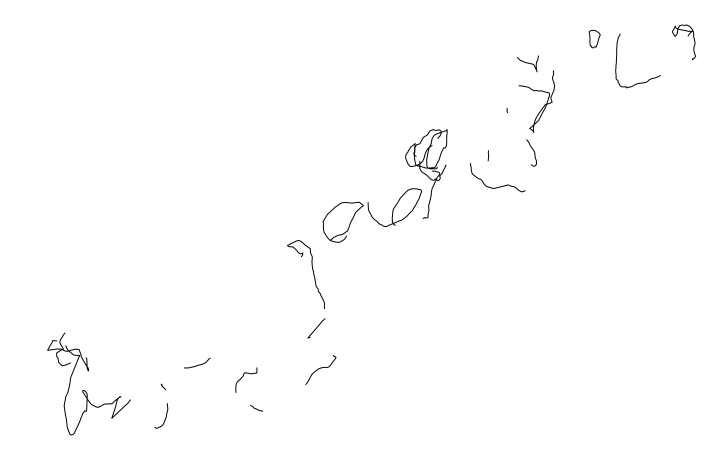

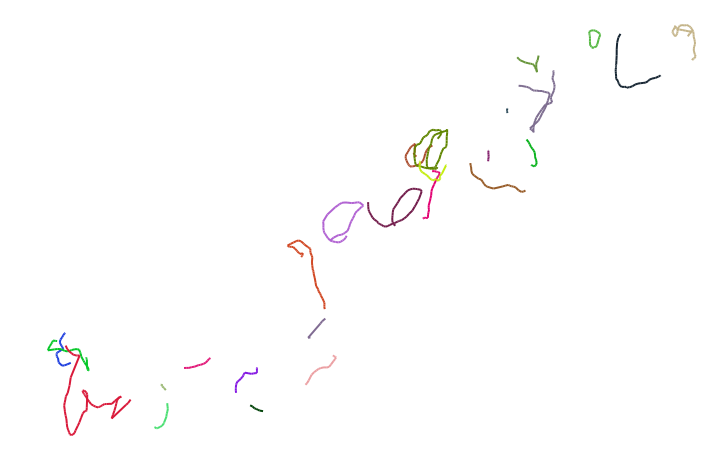

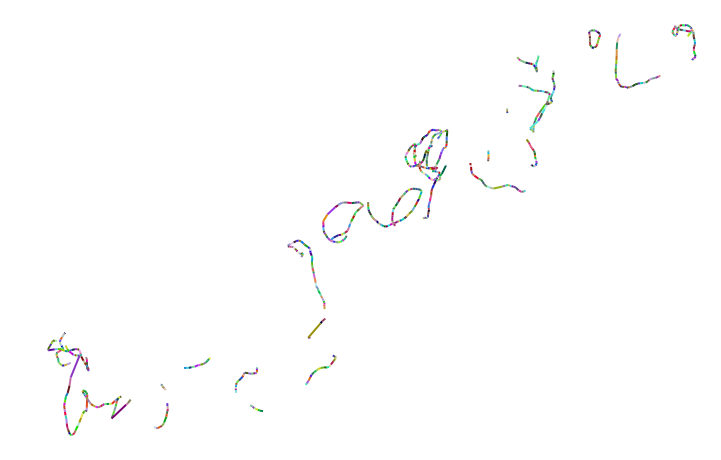

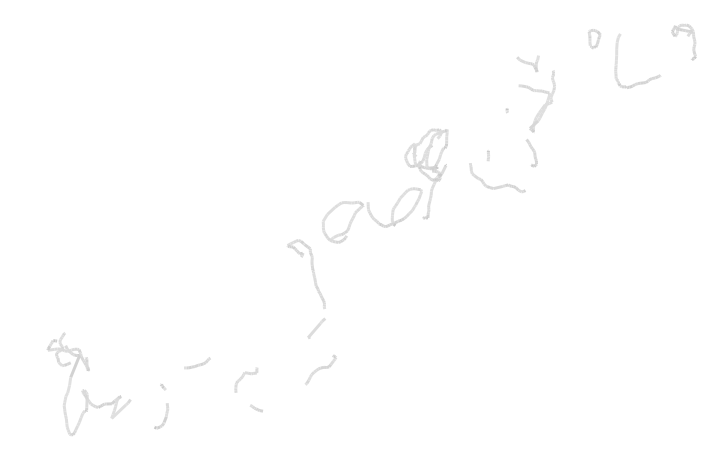

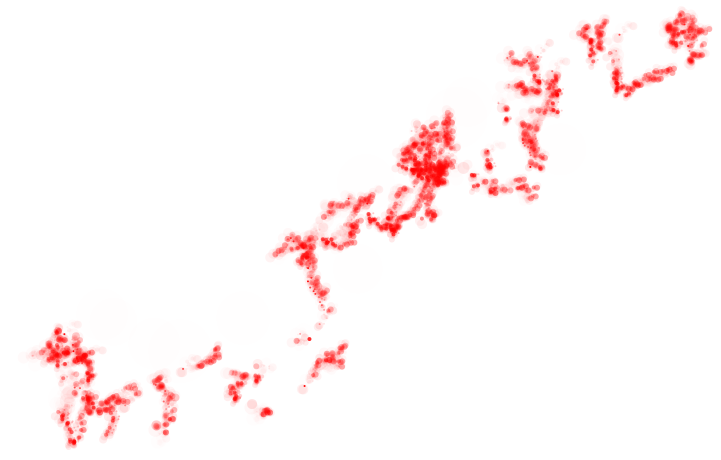

In [73]:
def sample_stroke(scale_factor=10, filename='sample'):
    [strokes, params] = model.sample(num=800, gpu=saved_args.gpu)
    draw_strokes(strokes, factor=scale_factor, 
                 svg_filename=filename+'.normal.svg')
    draw_strokes_random_color(strokes, factor=scale_factor,
                              svg_filename=filename+'.color.svg')
    draw_strokes_random_color(strokes, factor=scale_factor,
                              per_stroke_mode=False,
                              svg_filename=filename +
                              '.multi_color.svg')
    draw_strokes_eos_weighted(strokes, params,
                              factor=scale_factor,
                              svg_filename=filename +
                              '.eos_pdf.svg')
    draw_strokes_pdf(strokes, params, factor=scale_factor,
                     svg_filename=filename+'.pdf.svg')
    return [strokes, params]


[strokes, params] = sample_stroke()